In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [4]:
df=pd.read_csv('/Users/zabihbuda/Desktop/York Universiy files/Data Science /schulich_data_science_1/experiment_dataset.csv')
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. Your task is as follows:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?



In [6]:
df.isnull().sum()

Age           0
Location      0
Device        0
Variant       0
Time Spent    0
CTR           0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df['Variant'].unique()

array(['Control', 'Variant B', 'Variant A'], dtype=object)

In [9]:
df.head()

,Age,Location,Device,Variant,Time Spent,CTR
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630
3,21,Location1,Device3,Variant B,20.061300,0.109783
4,57,Location1,Device2,Variant B,34.495503,0.068579


In [10]:
df['Location'].unique()

array(['Location2', 'Location1', 'Location3'], dtype=object)

In [11]:
df_control=df[df['Variant']=='Control']
#df_variants=df[df['Variant']!='Control']
#df_variant_a=df[df['Variant']=='Variant A']
#df_variant_b=df[df['Variant']=='Variant B']

<Axes: xlabel='Age', ylabel='Counts'>

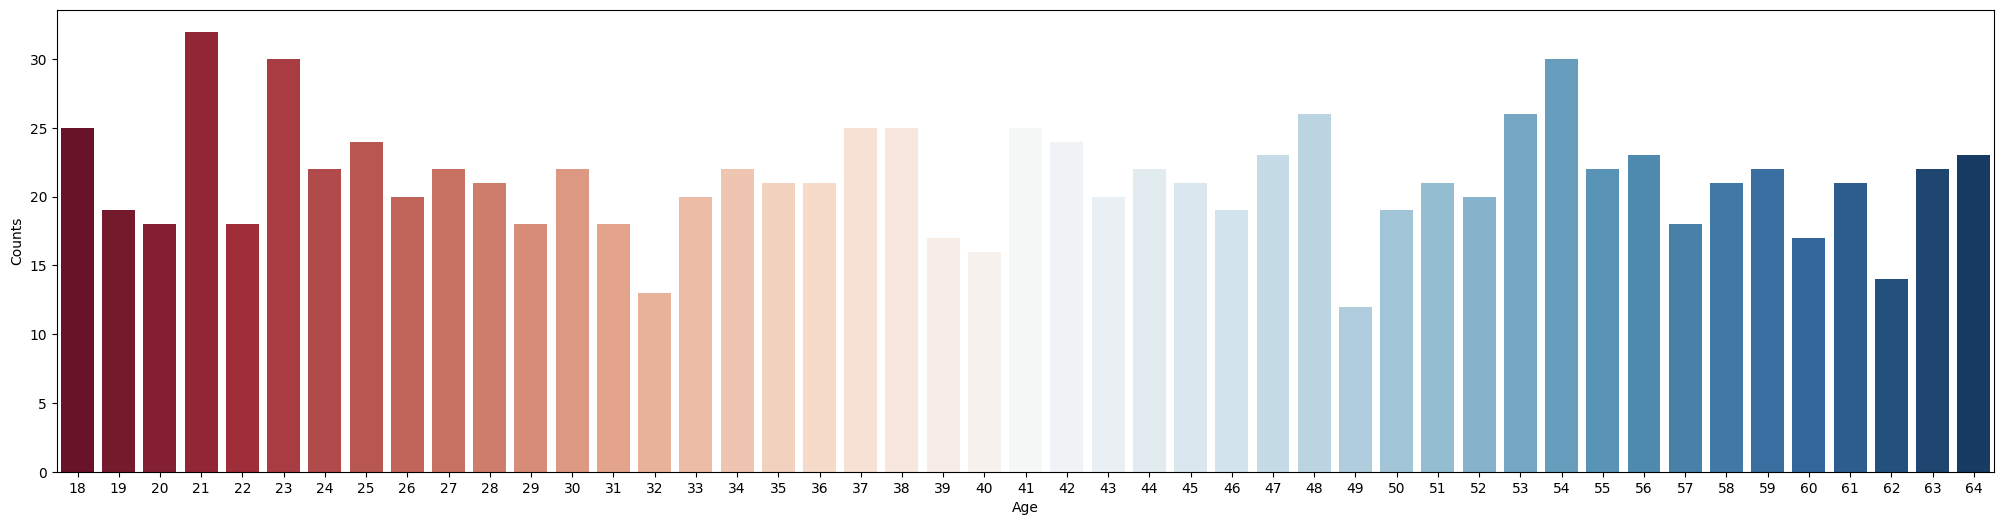

In [12]:
# analyzing data based on the age of the plyers
df_age=df['Age'].value_counts().to_frame()
df_age=df_age.reset_index()
df_age.columns=['Age', 'Counts']

plt.figure(figsize=(25, 6))
sns.barplot(x=df_age.Age, y=df_age.Counts, palette='RdBu')

<Axes: xlabel='Device', ylabel='Time Spent'>

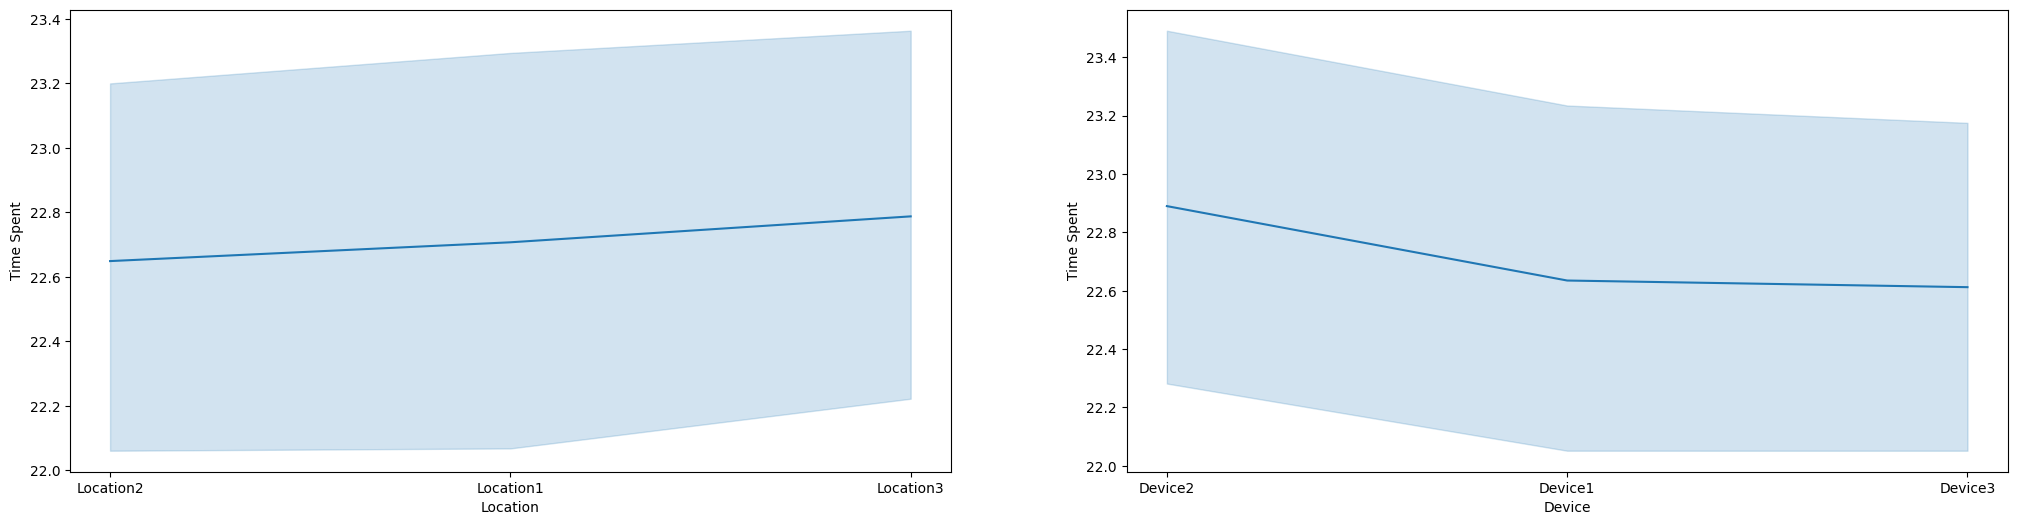

In [13]:

fig, axs=plt.subplots(1, 2, figsize=(25, 6))

sns.lineplot(ax=axs[0], y='Time Spent', x='Location',  data=df)
sns.lineplot(ax=axs[1],y='Time Spent', x='Device',  data=df)


It seems like there is no big difference in terms of time spent based on locations, but if we take a look at it based on devices, Device2 has higher time spent than Device1 and Device3.

<Axes: xlabel='Device', ylabel='CTR'>

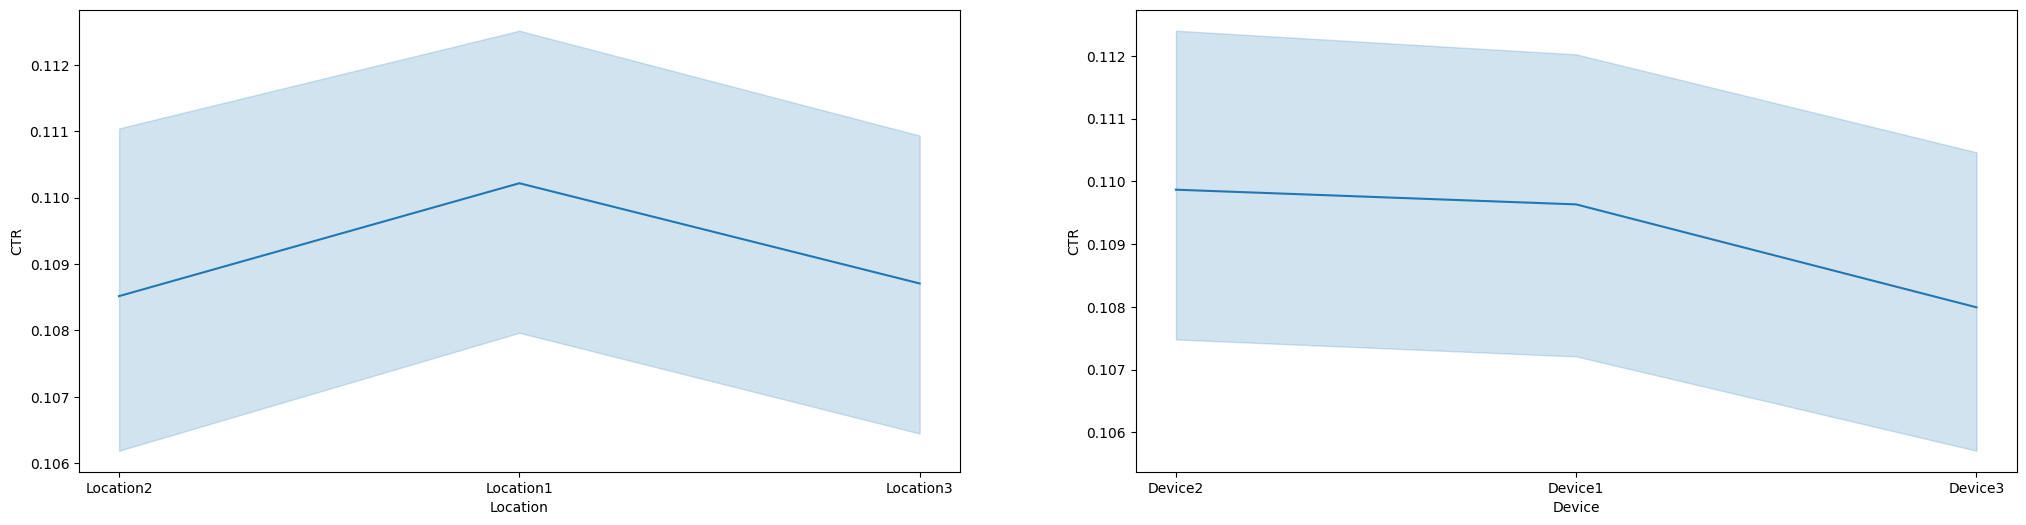

In [14]:
fig, axs=plt.subplots(1, 2, figsize=(25, 6))
sns.lineplot(ax=axs[0], y='CTR', x='Location',  data=df)
sns.lineplot(ax=axs[1],y='CTR', x='Device',  data=df)


From these two graphs, we can conclude Location1 and Device2 have a little bit higher Click-Through-Rate than the rest. 

<Axes: xlabel='Variant', ylabel='CTR'>

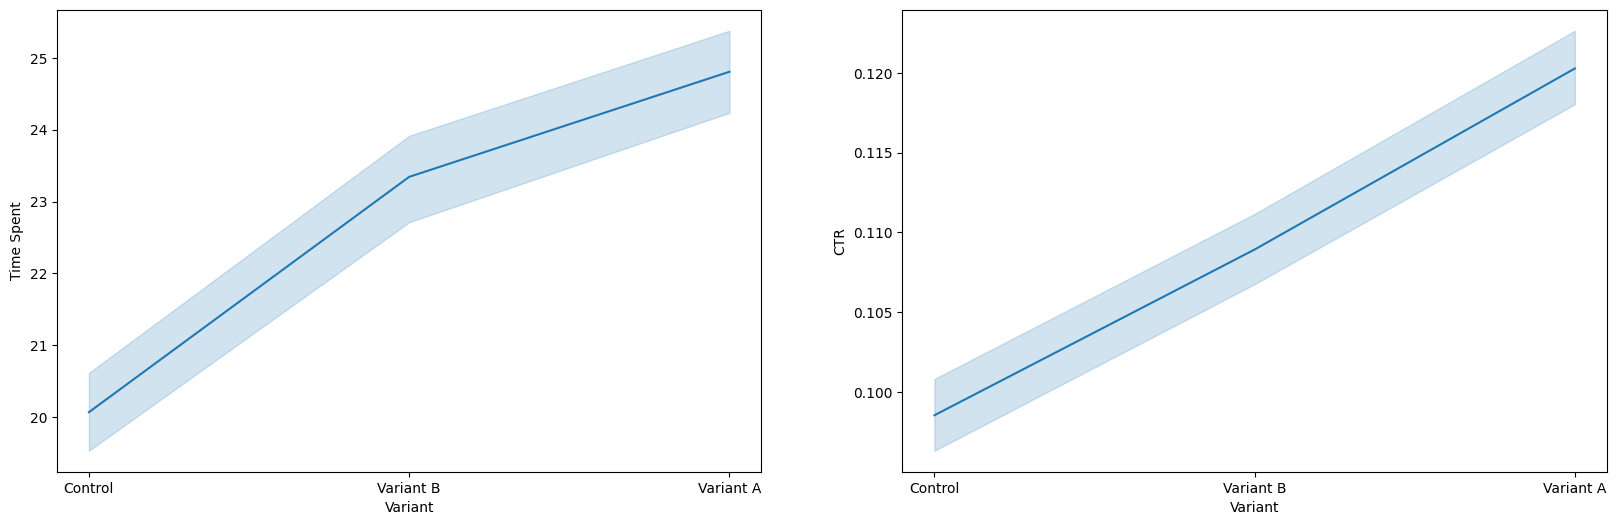

In [15]:
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(ax=axs[0],y='Time Spent', x='Variant', data=df)
sns.lineplot(ax=axs[1], y='CTR', x='Variant', data=df)

It seems like Variant A has higher Time Spent and CTR comparing to Control and Variant B.

Correlation of Times Spent and Age:  0.001970058767060918
                                                                                                              Correlation of CTR and Age:  -0.0010802583340339743


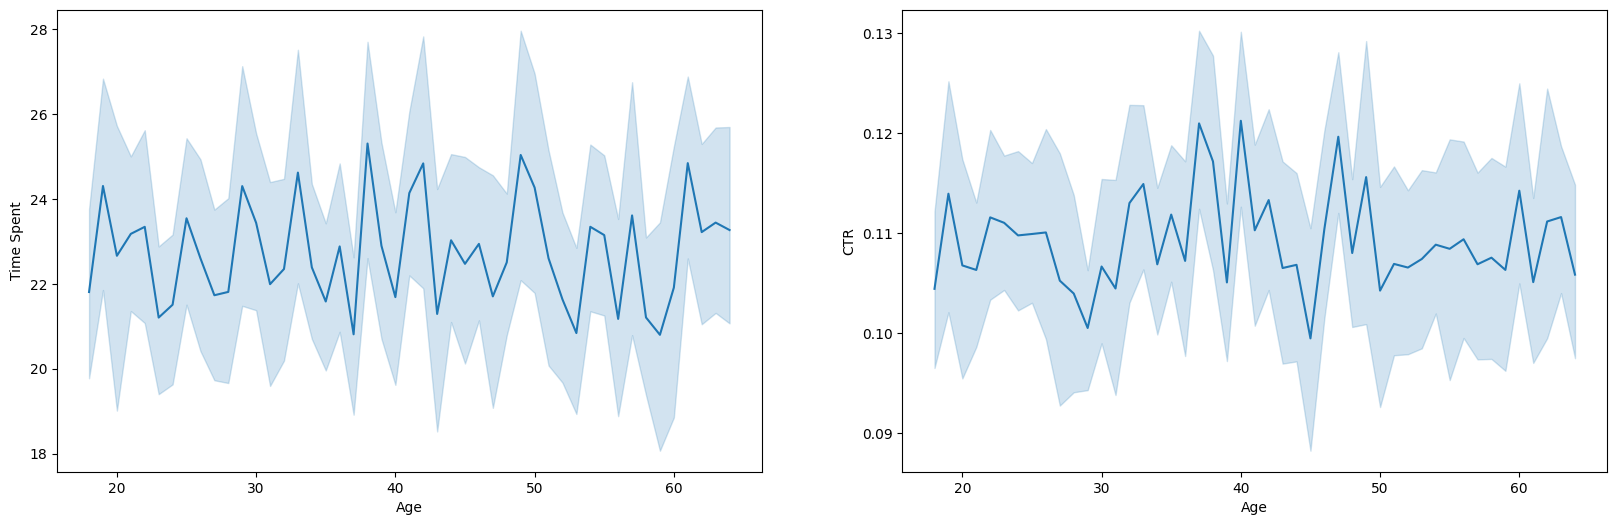

In [16]:
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(ax=axs[0], x='Age', y='Time Spent', data=df)
print('Correlation of Times Spent and Age: ', df['Age'].corr(df['Time Spent'])) 
sns.lineplot(ax=axs[1], x='Age', y='CTR', data=df)
print('                                                                                                              Correlation of CTR and Age: ', df['Age'].corr(df['CTR']) )


It means there is no strong relationship between the Age of the plyers and the time they spent on game. we can also calculate their relationship through correlation. And even if the graph and the correlation between the age of the players and CTR is negative but it is very weak.


In [17]:
df.groupby(['Variant'])[['Time Spent', 'CTR']].mean()

,Time Spent,CTR
Variant,,
Control,20.070781,0.098554
Variant A,24.805547,0.120269
Variant B,23.343783,0.108933


In [18]:
df.groupby(['Device'])[['Time Spent', 'CTR']].mean()

,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


In [19]:
df_age_timeCTR=df.groupby(['Age'])[['Time Spent', 'CTR']].mean()
df_age_timeCTR.sort_values(by=['Time Spent'], ascending=False)

,Time Spent,CTR
Age,,
38,25.301273,0.117152
49,25.031848,0.115586
61,24.839548,0.105097
42,24.833502,0.113295
33,24.616644,0.114898
19,24.301099,0.113928
29,24.299111,0.100519
50,24.264450,0.104252
41,24.134836,0.110276


In [20]:
df.groupby(['Location'])[['Time Spent', 'CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


In [21]:
# ANOVA test for checking each matric.
#Time Spent 
from scipy import stats
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print( p_val)



F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [22]:
# CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print( p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [31]:
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2)
print( p_val)


F_onewayResult(statistic=0.900516083557516, pvalue=0.3429834921061682)


In [30]:
t_stat, p_val=stats.ttest_ind(loc_1, loc_2)
print(f'T-statistics: {t_stat}')
print(f'P-value: {p_val}')

T-statistics: -0.1322242095325349
P-value: 0.8948477461937199


In [23]:
#Time Spent 
loc_1 = df[df['Device'] == 'Device1']['Time Spent']
loc_2 = df[df['Device'] == 'Device2']['Time Spent']
loc_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print( p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [24]:
#CTR
loc_1 = df[df['Device'] == 'Device1']['CTR']
loc_2 = df[df['Device'] == 'Device2']['CTR']
loc_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print( p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


Based on the ANOVA test, the p-values shows that there is no statistically significance and the experiement won't have any result it tested on devices and location, because the all the people have behaved the same even if they have different devices and are located in various locations. 

In [25]:
#Time Spent 
var1 = df[df['Variant'] == 'Variant A']['Time Spent']
var2 = df[df['Variant'] == 'Variant B']['Time Spent']
control = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.f_oneway(var1, var2, control)
print( p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [26]:
#CTR 
var1 = df[df['Variant'] == 'Variant A']['CTR']
var2 = df[df['Variant'] == 'Variant B']['CTR']
control = df[df['Variant'] == 'Control']['CTR']

p_val = stats.f_oneway(var1, var2, control)
print( p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


It terms of CTR and time spent, this ANOVA test results shows that there is statitically significant results. It means variants and control group have completely different behaviours in time they spent on playing games and click-through rate. 


Considering the results of ANOVA test and analysis, it is concluded that location, device, and age have a very small impact on time spent and click-through rate. However, the variant feature has its impact, specifically variant A, comparing to Variant B and control group. So, it is recommended that Variant A should be deployed to all users as users have more click on the features which is good for the business.

The introduction of the feature to the audience will take a few weeks, maybe two to three weeks before its fully deployed. The plan is to announce and advertize the feature to audience in the first week. In the second week, part of the users will experience the changes and based on their feedback, we can fully deploye the feature in the third week.